    Author: Mateusz Zaremba
    Student ID: 2834634
    Email: maz00027@students.stir.ac.uk
    This application was developed using Visual Studio Code debuggin tools.

  # University of Stirling

  # ITNPBD2, Representing and Manipulating Data

  # Assignment 2019

  # An analysis of the book, Around the World in 80 Days by Jules Verne

  This notebook forms the assignment instructions and submission document of the assignment for ITNPBD2 in 2019. Read the instructions carefully and enter code into the cells as indicated.

  You will need to download the text of the book from Canvas - it is in the same place as this file, and called aroundTW80Days.txt.

  Rename this file to be xxxxxx_BD2 where xxxxxx is your student number, then type your code into the boxes provided. Each question is given in a markdown call, and there is an empty box beneath each one where you enter your answer. These boxes should contain 2 things:

  - **The code that performs the required task**
  - **Comments that explain your code**

  Marks are given for both code (70%) and style and comments (30%). If you cannot get the code to work properly, you will still get some marks for correct comments. The marks available for each question are given in square brackets in each title.

  # Submission and Other Notes

  - Submit your notebook to canvas when it is complete
  - Make sure the version you submit contains the results of running every cell. The output should be visible without the need to run the code again

  ## Plagiarism

  Plagiarism is presenting somebody else’s work as your own. Plagiarism is a form of academic misconduct and is taken very seriously by the University. Students found to have plagiarised work can have marks deducted and, in serious cases, even be expelled from the University. Do not submit any work that is not entirely your own.

  The University’s full guidance on academic misconduct can be found here:

  http://stir.ac.uk/1x0


  ## 1) Open the file `aroundTW80Days.txt` and read its contents into a string [3]


  - Print the number of characters (letters, etc) in the whole book
  - Split the book into a Python list containing all the words of the book in order. At this stage, use string splitting, not a more fancy library like `nltk`. Call this variable `book_list`
  - Print the number of words in the book
  - Print the first 10 words of the book. It should look like this:

  `['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Around', 'the', 'World', 'in', '80', 'Days,']`

In [2]:
import random
import time
import string
# random seed
current_millisecond_time = lambda: int(round(time.time() * 1000))
random.seed(current_millisecond_time())

# Read the book into a string, use 'r' to prevent reading of special characters in the file name and,
# replace new line ('\n') characters with a white space.
data = open(r"aroundTW80Days.txt", "r").read().replace('\n',' ')

# Clean the data.
# Split the book into words.
book_words = data.split()

# 1. Number of characters in the book.
print("Number of characters in the book:", len(data), '\n')
# 2. Split the book into a sorted list.
book_list = sorted(list(book_words))
rnd = random.randint(100, 109)
print("Random sample from the sorted book:", book_list[rnd:rnd+5], '\n')
# 3. Number of words in the book.
print("Number of words in the book:", len(book_words), '\n')
# 4. The first 10 words of the book.
print("The first 10 words from the book:", '\n', book_words[0:10], '\n')


Number of characters in the book: 390222 

Random sample from the sorted book: ['"Are', '"Are', '"Are', '"Arrived', '"As'] 

Number of words in the book: 66313 

The first 10 words from the book: 
 ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Around', 'the', 'World', 'in', '80'] 



  ## 2) Now create a set containing all the unique words in the book [3]
  - Print the number of unique words it finds

In [2]:
# A 'set' stores values only once, so we're going to convert the list containing
# all the words in the book into a set, hence getting all the unique words.
# I think the best option for finding the unique words would be to:
# - Remove words which are digits, e.g., word '8' is in the 'book_words' but it's not a word per se
# - Remove all the punctuation - to prevent counting of, e.g., "Francisco?" and "Francisco" as two unique words
# - Convert all the words to lower case, to prevent words like: "THE", "The", "the" as being counted as unique
# This would disrupt the unique word count, as shown below:

# Get unique words from book_words and display their count.
book_words_unique = set(book_words)
print('Unique words found in \'book_words\':', len(book_words_unique))

# Remove digits, punctuation and convert to lower case.
unique_words = [word.strip(string.punctuation).lower() for word in book_words if not word.isdigit()]
unique_words = set(unique_words)
print("Actual number of unique words:", len(unique_words))


Unique words found in 'book_words': 12600
Actual number of unique words: 7500


  ## 3) Build a Dictionary of the words used in the book [3]
  - Build a Python dictionary (`dict`) in which the keys are the unique words in the book and the values are dictionary objects with fields `length` for word length and `freq` for frequency, e.g.:

  `{'the': {'length': 3, 'freq': 4303}}`


In [3]:
book_words_dict = dict()
# Warning - long execution!
[book_words_dict.update({word: (len(word), book_words.count(word))}) for word in book_words]
display(book_words_dict)


{'The': (3, 484),
 'Project': (7, 78),
 'Gutenberg': (9, 20),
 'EBook': (5, 1),
 'of': (2, 1871),
 'Around': (6, 4),
 'the': (3, 4303),
 'World': (5, 3),
 'in': (2, 987),
 '80': (2, 6),
 'Days,': (5, 2),
 'by': (2, 371),
 'Jules': (5, 3),
 'Verne': (5, 3),
 'This': (4, 48),
 'eBook': (5, 5),
 'is': (2, 292),
 'for': (3, 406),
 'use': (3, 15),
 'anyone': (6, 6),
 'anywhere': (8, 4),
 'at': (2, 578),
 'no': (2, 124),
 'cost': (4, 9),
 'and': (3, 1794),
 'with': (4, 551),
 'almost': (6, 19),
 'restrictions': (12, 2),
 'whatsoever.': (11, 2),
 'You': (3, 31),
 'may': (3, 38),
 'copy': (4, 9),
 'it,': (3, 37),
 'give': (4, 17),
 'it': (2, 322),
 'away': (4, 16),
 'or': (2, 186),
 're-use': (6, 2),
 'under': (5, 41),
 'terms': (5, 20),
 'License': (7, 8),
 'included': (8, 3),
 'this': (4, 291),
 'online': (6, 4),
 'www.gutenberg.net': (17, 2),
 'Title:': (6, 1),
 'Days': (4, 1),
 'Author:': (7, 1),
 'Release': (7, 1),
 'Date:': (5, 1),
 'May': (3, 2),
 '15,': (3, 1),
 '2008': (4, 1),
 '[EBoo

  ## 4) Use the dictionary that you created above to find the most commonly used word in the book [3]
  - Print the word and the number of times it appeared in the book

In [4]:
# The most common word is 'the'.
most_common_word = max(book_words_dict.items(), key=lambda i : i[1][1])
print('The most common word:', most_common_word[0], "Count:", most_common_word[1][1])
# But let's see if we haven't missed anything:
print("THE:", book_words_dict['THE'])
print("The:", book_words_dict['The'])
print("the:", book_words_dict['the'])
# 'THE', 'The' and 'the' were counted as separate words. It still means that 'the' is the most common word but,
# its count is incorrect. Let's fix this:
most_common_word_count = int(most_common_word[1][1] + book_words_dict['THE'][1] + book_words_dict['The'][1])
print('The most common word:', most_common_word[0], "Count:", most_common_word_count)


The most common word: the Count: 4303
THE: (3, 63)
The: (3, 484)
the: (3, 4303)
The most common word: the Count: 4850


  ## 5) Write a generator function to produce each word and its length each time it yields a value [6]

  - The function should accept a single argument: the list of words in the book
  - It should yield a tuple (word, word_len)
  - Call the function to create a generator but do not iterate over it at this stage

In [5]:
# Generator expression which yields a tuple of a word and its length;
# arguments:               list
def findInBookWordOfLength(book):
    for word in book:
        if len(word) == 9:
            yield (word, len(word)) 

findInBookWordOfLength(book_words)

# The function could be also overwritten to accept - the looking length of the word;
# arguments:               list, word length
def findInBookWordOfLength(book, word_length):
    for word in book:
        if len(word) == word_length:
            yield (word, len(word)) 

findInBookWordOfLength(book_words, 9)


<generator object findInBookWordOfLength at 0x10c482050>

  ## 6) Use a comprehension over the generator you just made to list all the words with 9 letters [6]

  - Print all those words
  - Extra points if each word is selected only once

In [8]:
# To not count a string with 9 characters, but with 9 letters, we will remove punctuation from 'book_words',
# make them all lower case, so, e.g., words like: 'Gutenberg' and 'GUTENBERG' don't get counted twice;
# we will make sure to not count words with apostrophes, e.g., 'lincoln's', 
# which would also make them falsely, 9 letter words;
# we will remove double hyphened words, from Phileas Fogg's telegrams, like: 'some--the',
# and hyphened words, e.g., 'poop-deck', since they're not 9 lettered words, per se.
# At last, we will check for duplicates and print, each 9 lettered word only once.
# For this purpose, we will overwrite the previous generator function:

# arguemnts:               list, word length
def findInBookWordOfLength(book, word_length):
    # A list to prevent duplicate yields.
    seen_before = []
    for word in book:
        # Strip the word's punctuation and:
        word = word.strip(string.punctuation)
        # Check if the word is of the desired length.
        if len(word) == word_length:
            # Prepare the word for duplicate checking.
            word = word.lower()
            # Check if it's a duplicate.
            if word not in seen_before:
                # Check if the word contains an apostrophe.
                if "'" not in word:
                    # Check if it's a hyphened word.
                    if "-" not in word:
                        # Check if it it contains a double hyphen.
                        if "--" not in word:
                            # If all of this checks out, the word is a unique word of the desired length
                            seen_before.append(word)
                            yield (word, len(word)) 

# Use a comprehension over the generator function to yield words with 9 letters.
nine_worders = [word for word in findInBookWordOfLength(book_words, 9)]

# Display the words of length 9.
display(nine_worders)

[('gutenberg', 9),
 ('convinced', 9),
 ('detective', 9),
 ('passports', 9),
 ('beautiful', 9),
 ('banknotes', 9),
 ('disgorges', 9),
 ('thousands', 9),
 ('singapore', 9),
 ('tankadere', 9),
 ('antipodes', 9),
 ('francisco', 9),
 ('undergoes', 9),
 ('incidents', 9),
 ('railroads', 9),
 ('interests', 9),
 ('happiness', 9),
 ('attention', 9),
 ('personage', 9),
 ('resembled', 9),
 ('certainly', 9),
 ('resounded', 9),
 ('exchequer', 9),
 ('gentleman', 9),
 ('societies', 9),
 ('admission', 9),
 ('exclusive', 9),
 ('regularly', 9),
 ('sometimes', 9),
 ('travelled', 9),
 ('corrected', 9),
 ('charities', 9),
 ('congenial', 9),
 ('relatives', 9),
 ('supported', 9),
 ('illumined', 9),
 ('resources', 9),
 ('succulent', 9),
 ('proffered', 9),
 ('porcelain', 9),
 ('decanters', 9),
 ('contained', 9),
 ('beverages', 9),
 ('eccentric', 9),
 ('confessed', 9),
 ('something', 9),
 ('sumptuous', 9),
 ('dismissed', 9),
 ('successor', 9),
 ('grenadier', 9),
 ('indicated', 9),
 ('according', 9),
 ('apartment

  ## 7) Now iterate over your original list of words, `book_list` and find all the words with more than 14 letters, which do not contain any of these characters: [6]

  `. - \ /`

In [7]:
# Generator to find words with 14 letters or more but without these special characters `. - \ /` in them.
fourteeen_letter = (word for word in book_list if len(word) >= 14
        if '-' not in word 
        if '.' not in word
        if '\\' not in word
        if '/' not in word)

for i in fourteeen_letter:
    print(i)


"Passepartout!"
"Passepartout!"
"Passepartout?"
CONSEQUENTIAL,
Ecclesiastical
Entomologists,
MERCHANTIBILITY
PASSEPARTOUT'S
PASSEPARTOUT'S
Passepartout!"
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout's
Passepartout?"
Passepartout?"
Passepartout?"
REPRESENTATIONS,
Redistributing
Redistribution
characteristic
circumference,
communication,
communication;
conscientiously
conscientiously
demonstration,
determination,
disappointment
disappointment
disappointment
disappointment
disappointment
disappointment,
disappointment;
electronically
electronically,
establishments
fortifications
identification
inconvenience;
indefatigably,
insurmountable
insurmountable
mathematically
mathematically
mathematically
mathematically
meteorologist,
nationalities,
nonproprietary
northeasterly;

  ## 8) Split the book into a list of chapters [6]

   - This should be a list of strings
   - Hint - split on the word 'Chapter'
   - Call the list `chapter_list`


In [8]:
# This section answers Question 8 but it will also prepare the data to answer questions: 9, 10, 11 and 12

# These lists will become our 2D tables of:
# - Table of contents - it will consist of the Nth 'Chapter' and its 'Description'
table_of_contents = list()
# - Chapter and their content - it will consist of the Nth Chapter and its 'Content'.
chapters_and_content = list()

# Here we create our 2d tables.
# We're iterating through all the words in the book using 'book_words' list.
# We will look for the first occurrence of - 'Chapter'. Because the table of contents is written
# in all capitals, the word - 'CHAPTER' - will be omitted as well as the chapters' description and 
# initial publisher notes - which we don't really need. Each chapter starts with the same 
# chapter description, as in the table of contents, so we will be able to get it differently.
# When we encounter the word 'Chapter' this means:
# - The next object is chapter's number.
# - Next are the uppercase letters so they're the chapter's description.
# - Next is the chapter's description, which will end with the next occurrence of the word "Chapter";
# the exception is the last chapter, which ends with - '***' - and next are the publisher's notes. 
# We make sure to take this into consideration and not count the publisher's notes as the chapter's content,
# which would break the whole idea and would disrupt the last chapter's word count.
# - This ends our iteration; we change the iterators value to point to the current place in the loop
#   and proceed to load the next chapter because it's already waiting in the cue!
i = 0
while i < len(book_words):
    # Here we will get the chapter's: name, number, description and content.
    if "Chapter" in book_words[i]:
        # Flush temporary holders to prepare them for the next chapters.
        chapter_tag_holder = list()
        chapter_desc_holder = list()
        chapter_content_holder = str()
        chapter_content_holder.encode('utf-8', 'replace')

        # The next word is the chapter's number, so we save both in a list.
        chapter_tag_holder.append(book_words[i] + " " + book_words[i+1])
        # The next words are all in capitals and are the chapter's description.
        j = i+2
        # We keep iterating until there are no capital letters left.
        while book_words[j].isupper():
            # Save the chapter's description in a list.
            chapter_desc_holder.append(book_words[j])
            j+=1
        # Use the previous list containing the chapter's name and number, like 'Chapter I',
        # and the new list that has its description to create a 2d list of chapters and their descriptions
        table_of_contents.append([chapter_tag_holder, chapter_desc_holder])
        # If we keep going until we encounter the next word 'Chapter', 
        # we can get the entire chapter into a string!
        while book_words[j] != "Chapter" and j != len(book_words)-1:
            # Make sure we don't go beyond the last chapter
            if book_words[j] != '***':
                current_word = book_words[j]
                chapter_content_holder += " " + str(book_words[j])
                j+=1
            else:
                break
        # Use the list containing the chapter name and number and the list with its content
        # to create a 2d table of chapters and their content.
        chapters_and_content.append([chapter_tag_holder, chapter_content_holder])
        # We finished loading the chapter's content because the current word is "Chapter" and next,
        # is the next chapter, and we want to do all the steps for it again.
        # Continue iterating from where 'j' is pointing to.
        i=j
    else:
        i+=1

# Create the list of chapters.
chapter_list = [table_of_contents[i][0] for i in range(len(table_of_contents))]


  ## 9) Remove the first entry from the chapter list [6]
  The first item in the chapter list is just the preface and chapter list. Copy that into a separate string variable and then remove it from the chapter list

In [9]:
# If I wanted to remove the first entry from my chapter list I'd do it like this:
# chapter_list.remove(chapter_list[0])

# but because I ended up not loading the table of contents, this step won't be necessary. 
# Luckily, I was able to get all the necessary information about the Chapter in the previous question:
# - Chapter name
# - Chapter number
# - Chapter description
# - Chapter content


  ## 10) Now take each chapter and split it into a list of words, producing a list of lists - one for each chapter [6]

In [10]:
# This step was already done in the answer to Question 8
display(table_of_contents)


[[['Chapter I'],
  ['IN',
   'WHICH',
   'PHILEAS',
   'FOGG',
   'AND',
   'PASSEPARTOUT',
   'ACCEPT',
   'EACH',
   'OTHER,',
   'THE',
   'ONE',
   'AS',
   'MASTER,',
   'THE',
   'OTHER',
   'AS',
   'MAN']],
 [['Chapter II'],
  ['IN',
   'WHICH',
   'PASSEPARTOUT',
   'IS',
   'CONVINCED',
   'THAT',
   'HE',
   'HAS',
   'AT',
   'LAST',
   'FOUND',
   'HIS',
   'IDEAL']],
 [['Chapter III'],
  ['IN',
   'WHICH',
   'A',
   'CONVERSATION',
   'TAKES',
   'PLACE',
   'WHICH',
   'SEEMS',
   'LIKELY',
   'TO',
   'COST',
   'PHILEAS',
   'FOGG',
   'DEAR']],
 [['Chapter IV'],
  ['IN',
   'WHICH',
   'PHILEAS',
   'FOGG',
   'ASTOUNDS',
   'PASSEPARTOUT,',
   'HIS',
   'SERVANT']],
 [['Chapter V'],
  ['IN',
   'WHICH',
   'A',
   'NEW',
   'SPECIES',
   'OF',
   'FUNDS,',
   'UNKNOWN',
   'TO',
   'THE',
   'MONEYED',
   'MEN,',
   'APPEARS',
   'ON',
   "'CHANGE"]],
 [['Chapter VI'],
  ['IN',
   'WHICH',
   'FIX,',
   'THE',
   'DETECTIVE,',
   'BETRAYS',
   'A',
   'VERY',
   'NA

  ## 11) Print only the titles from each chapter [6]
  - Clue: The title of each chapter is written in UPPER CASE and is the first thing in each chapter. Therefore, printing words until you find one that is not upper case will print the title.

In [11]:
for i in range(len(table_of_contents)):
    print(table_of_contents[i][0])


['Chapter I']
['Chapter II']
['Chapter III']
['Chapter IV']
['Chapter V']
['Chapter VI']
['Chapter VII']
['Chapter VIII']
['Chapter IX']
['Chapter X']
['Chapter XI']
['Chapter XII']
['Chapter XIII']
['Chapter XIV']
['Chapter XV']
['Chapter XVI']
['Chapter XVII']
['Chapter XVIII']
['Chapter XIX']
['Chapter XX']
['Chapter XXI']
['Chapter XXII']
['Chapter XXIII']
['Chapter XXIV']
['Chapter XXV']
['Chapter XXVI']
['Chapter XXVII']
['Chapter XXVIII']
['Chapter XXIX']
['Chapter XXX']
['Chapter XXXI']
['Chapter XXXII']
['Chapter XXXIII']
['Chapter XXXIV']
['Chapter XXXV']
['Chapter XXXVI']
['Chapter XXXVII']


  ## 12) Measure the length of each chapter and plot the values on a bar chart [9]
  - Draw a horizontal bar chart so you can read the chapter numbers down the left side
  - Set the headings to be `Chapter I` to `Chapter XXXVI` do this with code that extracts the chapter headings from the text, not by hand
  - Give the chart appropriate title and axis labels
  - Use whatever plotting library you like. Matplotlib is fine.

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np



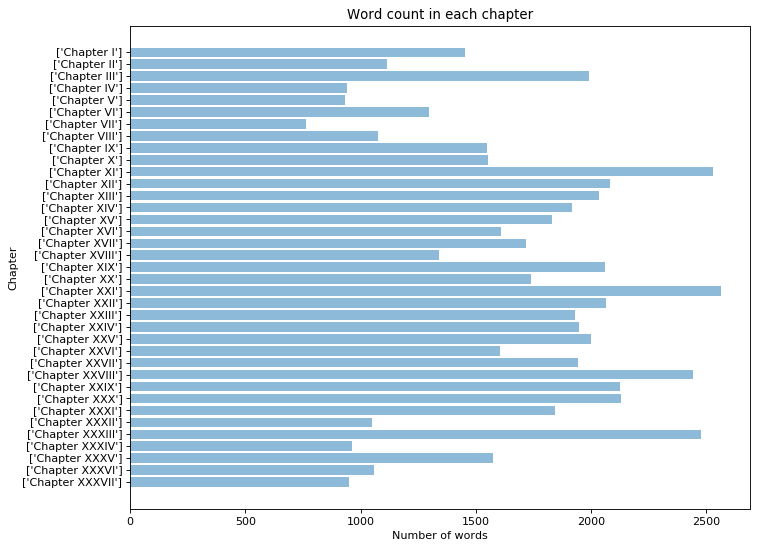

In [13]:
# Increase the size of the plot.
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# Create a list of chapters' lengths in reversed order; remember to reverse the order of chapters as well!
chapter_length = [len(chapters_and_content[i][1].split()) for i in reversed(range(len(chapters_and_content)))]

# Prepare the bar chart for plotting.
y_pos = np.arange(len(chapter_list))
plt.barh(y_pos, chapter_length, align='center', alpha=0.5)
# Set the tick locations and labels of y-axis in reversed order.
plt.yticks(y_pos, reversed(chapter_list))
plt.ylabel('Chapter')
plt.xlabel('Number of words')
plt.title('Word count in each chapter')
# Plot the bar chart.
plt.show()


  ## 13) Plot Locations Mentioned in the Book on a Map [9

  - Using a plotting package of your choice, plot the locations of all the cities mentioned in the book
  - You can use the file called `cities.txt` to look up city names and locations
  - Look at its contents to work out how to use it. The locations are given as latitude, longitude, altitude (you won't need that last one!)
  - You should then write code that searches the book for all the cities in `cities.txt`. Any that it finds should be plotted on the map
  - Here is a useful list of words that appear in the book, but are NOT to be plotted:
  `['Victoria','San','Imperial','Come','San Pablo','Queenstown','Young','Lincoln','Forster','Formosa']`

In [14]:
# 'cities.txt' was not necessary. Instead, goetext library was used to find all the city names in the book.
# The library is not perfect and finds a lot of odd entries.
from geotext import GeoText



In [15]:
# Using geotext library to find all cities in the book.
places = GeoText(data)
# Remove duplicates by converting city_names list to a set.
city_names = list(set(places.cities))

# Cleaning the data - removing odd entries.
# There is one city in Czech Republic called "Most", which is a determiner in English but,
# to GeoText, it looks like a name of a city.
# Because Phileas Fogg did not visit Most in Czech Republic, this entry is manually removed.
city_names.remove('Most')
# The data is further improved by removal of the entries that are not a city in the context of the book.
# Visual exploration of the produced map was also helpful.
# Many iterations were performed and to my best knowledge, Phileas Fogg did not visit:
# name
city_names.remove('Stuart')
# word
city_names.remove('Of')
# word
city_names.remove('Temple')
# continent
city_names.remove('Asia')
# word
city_names.remove('Auburn')
# word
city_names.remove('Mission')
# word
city_names.remove('Independence')
# word
city_names.remove('Imperial')
# name
city_names.remove('Wilson')
# word
city_names.remove('Deal')
# word
city_names.remove('Bay')
# word
city_names.remove('Union')
# word
city_names.remove('Cedar')
# indian tribe
city_names.remove('Sioux')
# name
city_names.remove('Fairbanks')
# rifle
city_names.remove('Enfield')
# nickname
city_names.remove('Athens')



In [16]:
# folium library is used to plot the cities on the map.
import folium
# geopy library is used to find the city's coordinates based on its name.
from geopy.geocoders import Nominatim



In [17]:
# Create a folium map.
m = folium.Map(
    location=[0, 0],
    zoom_start=2.0,
    tiles='Stamen Terrain'
)
tooltip = 'Phileas Fogg Probably Visited:'

geolocator = Nominatim(user_agent="phileas_fogg_journey")

# Populate the folium map with city names from the book and their geo-locations.
for city in city_names:
    location = geolocator.geocode(city)
    folium.Marker(location=[location.latitude, location.longitude], popup=city, tooltip=tooltip).add_to(m)

# Plot the map of all the cities mentioned in the book (Might take a minute to load);
# if there's an error, please try running the cell again.
m

# Uncomment to save the map in html
# m.save('80daysCities.html')


  ## 14) NLTK Sentiment Analysis [9]

  ## Use the VADER tool in the nltk library to analyse the sentiment of each chapter and plot the positive sentiment level over time on a chart

In [18]:
# From nltk import book.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



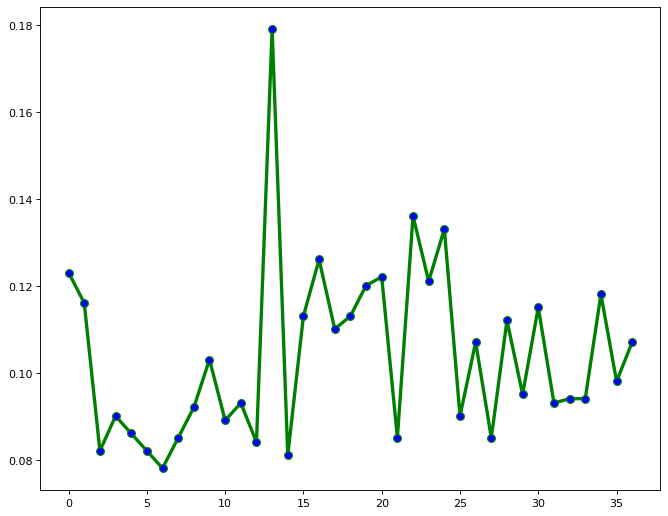

In [19]:
# Increase the size of the plot.
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# Get positive sentiment score from all the chapters.
pos_sent_scores = [sia.polarity_scores(i[1])['pos'] for i in chapters_and_content]
  
# Plotting the points.
plt.plot(list(range(len(pos_sent_scores))), pos_sent_scores, color='green', linestyle='-', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=7) 
  
# Call to show the plot.
plt.show()


  ## 15) Now think of some further analysis you could do based on the text of this book [19]

  It should use other data sources you find online and tell an additional story around the data. Suggested data and sources include:

  - Travel and accommodation sites
  - User reviews of the book
  - Book sales data about this and other related books
  - News stories about places in the book
  - Travel times and distances
  - Pictures of places in the book

  Your analysis might consider how Phileas Fogg would travel if he had to make the same journey today - what would it cost, where might he stay, what would be happening in the places he would visit? How would you aquire the data you need? Can you connect to data online using REST? Do you need to perform scraping with something like ScraPy? What other packages would you need and what would you use them for?

  Write in English (not Python) about your idea including data sources, Python packages used, presentation and visualisation methods, and potential problems you can forsee.

  Add some example of code that perform some of the tasks required for your full analysis. You do not have to implement the whole idea, just some illustrative parts.

  Use as many cells below as you need - both code and markdown to explain your ideas. This part is worth 19 of the marks overall.


In [20]:
# The answer is given in the markdown cell below


    An attempt to improve the cities mentioned in the book was made. To my best knowledge a successful one but
    the analysis could be further improved by plotting only the cities Phileas Fogg visited.
    A full journey with connections plotted between the cities could be made as well.
    The connections could show the amount of time the journey took; this could be done interactively with a mouse hover
    over the link showing the journey's time. We could also show the time it would take today to travel that link and
    show up-to-date train and airplane schedules. This could be a fun tool to play with while reading the book, to see
    how much time it would take Phileas to travel not only today, but right now.
    Google Maps would be a great help with this. We can get the travel calculation, time and locations.
    Google on its official github account has google maps python integration tools (https://github.com/googlemaps/google-maps-services-python);
    it features an example usage of finding directions via a public transit:

In [21]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='Add Your Key here')

# Geocoding an address
geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')

# Look up an address with reverse geocoding
reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))

# Request directions via public transit
now = datetime.now()
directions_result = gmaps.directions("Sydney Town Hall",
                                     "Parramatta, NSW",
                                     mode="transit",
                                     departure_time=now)


ModuleNotFoundError: No module named 'googlemaps'

    Given that it's a google maps tools we can get a lot more out of it: travel cost, weather conditions in the areas,
    pictures of the area, reviews and more.
    Using Scrapy, we could scrap google restaurant reviews and hotels, at the locations Phileas visited, and add these to our interactive map.
    It could be used to create a companion app for anyone who would like to travel the world like Phileas did; when they would be
    in the same location as Phileas was, it could send them a notification with the book's chapter relative to their current location.
    Getting the users location could also be done with google maps API.
    To show information about the place they're at and the book's chapter we'd have to prepare the data, a bit like
    we did in question 12 of this assignment but a lot more thoroughly to ensure that all the places have a proper context and
    Phileas was actually travelling through them.
    In terms of image processing, if it was an illustrated version of 'Around the World in 80 Days', we could use
    'face_recognition' library (source: https://github.com/ageitgey/face_recognition) to analyse peoples' emotions
    in the pictures and plot 'an emotional' journey that heroes of the book went through. This could be combined with
    VADER sentiment analysis to see how these two compares.
    Further analysis could involve scrapping the book's reviews from the web and see how they've been changing over time.
    Have they improved, got worse? We could also look at the selling data, plot them over time, and see if there were any
    anomalies in the book's popularity; we might be able to check if they were related to some other events, e.g.,like a premier of a movie adaptation.
    We could also scrap the web in search of 'Around the world in 80 days' themed events, like novel readings etc.
    This would also be a very good popularity indicator of a book that was published almost 150 years ago and is still
    very well known. It would be interesting to try to analyse this phenomenon. Maybe scrapping the news and comparing the
    book's popularity charts would give us any results? Are people more inclined to read '80 days' in some particular time,
    like winter; when there's very little sun and a prospect of travel is miniscule? All the unexpected things we can get from data
    makes it so much more exciting!